In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [2]:
df=pd.read_csv('Mall_Customers.csv')
x=df.iloc[:,3:].values

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x.shape

(200, 2)

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss=[]
for i in range(1,11):
    k=KMeans(n_clusters=i,init='k-means++',random_state=42)
    k.fit(x)
    wcss.append(k.inertia_)

C:\Users\abdel\anaconda3\envs\tfgpu\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


### wcss

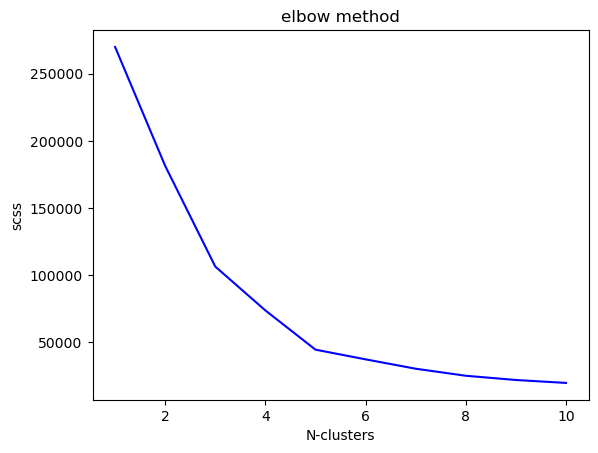

In [8]:
plt.plot(range(1,11),wcss,color='blue')
plt.xlabel('N-clusters')
plt.ylabel('scss')
plt.title('elbow method')
plt.show()

In [9]:
kmean=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [10]:
kmean.fit(x)

KMeans(n_clusters=5, random_state=42)

In [11]:
y_pred=kmean.predict(x)# here we got the y which is each customer and the clusster he/she belongs to

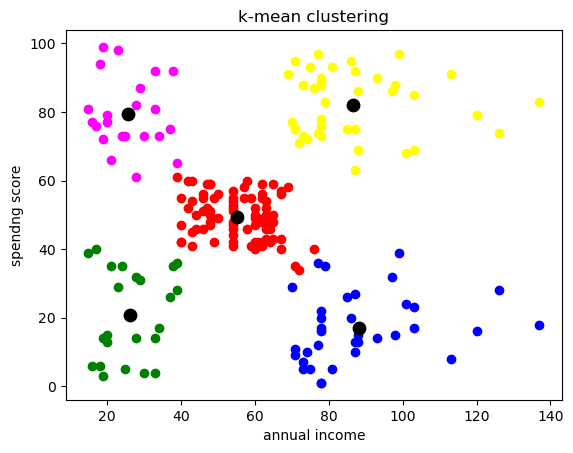

In [12]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],color='red',label='c1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],color='blue',label='c2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],color='green',label='c3')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],color='magenta',label='c4')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],color='yellow',label='c5')
plt.scatter(kmean.cluster_centers_[:, 0],kmean.cluster_centers_[:,1],s=80,c='black',label='centeroid')
plt.xlabel('annual income')
plt.ylabel('spendng score')
plt.title('k-mean clustering')
plt.show()


